# ANN REGRESSION MODEL

## The Data



https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [8]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv("kc_house_data.csv")
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0           0     0  ...      7        1180   
1          7242     2.0           0     0  ...      7        2170   
2         10000     1.0           0     0  ...      6         770   
3          5000     1.0           0     0  ...      7        1050   
4          8080     1.0           0     0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0           0     0  ...      8        1530   
21593      5813     2.0           0     0  ...      8        2310   
21594      1350     2.0           0     0  ...      7        1020   
21595      2388     2.0           0     0  ...      8        1600   
21596      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21592              0      2009             0    98103  47.6993 -122.346   
21593              0      2014             0    98146  47.5107 -122.362   
21594              0      2009             0    98144  47.5944 -122.299   
21595              0      2004             0    98027  47.5345 -122.069   
21596              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007547      0.234292      3.409825   
std    4.141264e+04      0.539683      0.086549      0.766390      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     291.725008   1970.999676     84.464787   
std        1.173200    827.759761     442.667800     29.375234    401.821438   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

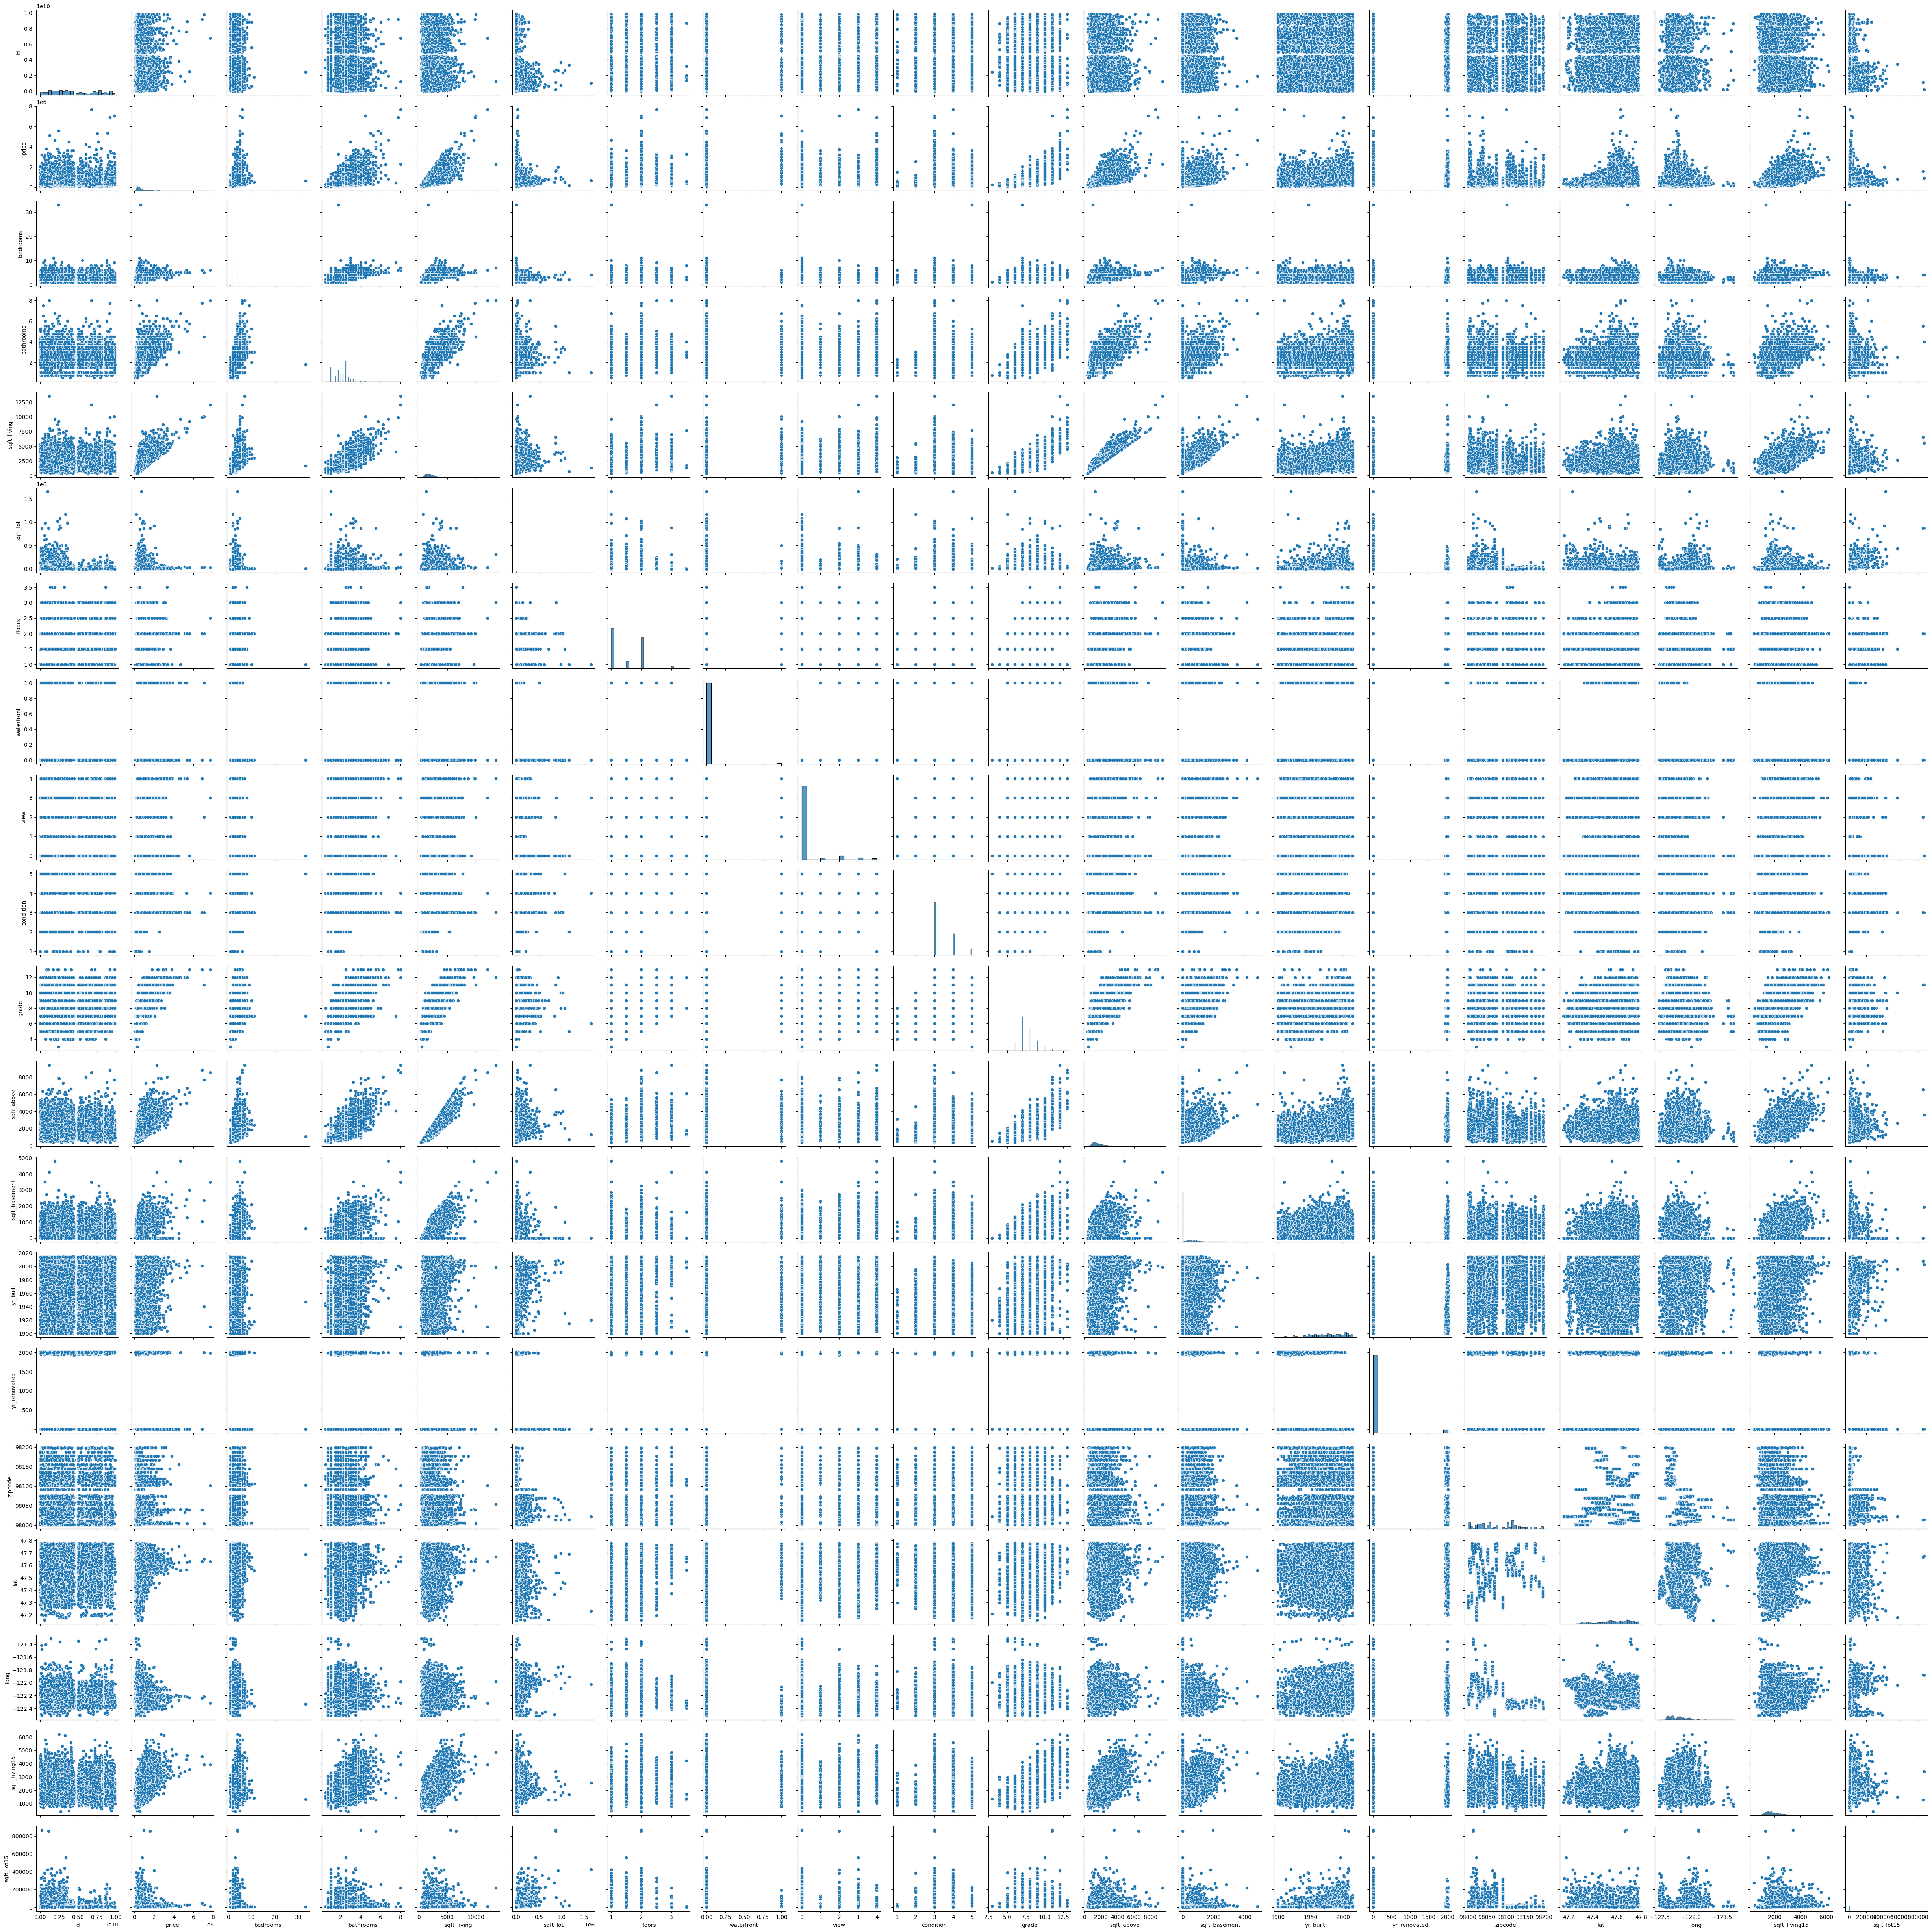

In [6]:
sns.pairplot(df)

### Feature engineering for date

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['month'] = df['date'].apply(lambda date:date.month)

In [9]:
df['year'] = df['date'].apply(lambda date:date.year)

<Axes: xlabel='year', ylabel='price'>

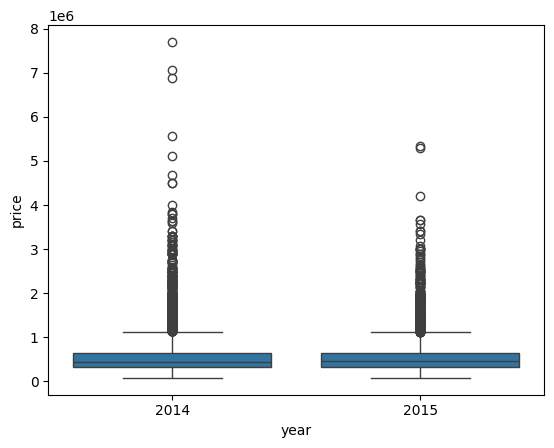

In [10]:
sns.boxplot(x = df['year'],y = df['price'])

<Axes: xlabel='month', ylabel='price'>

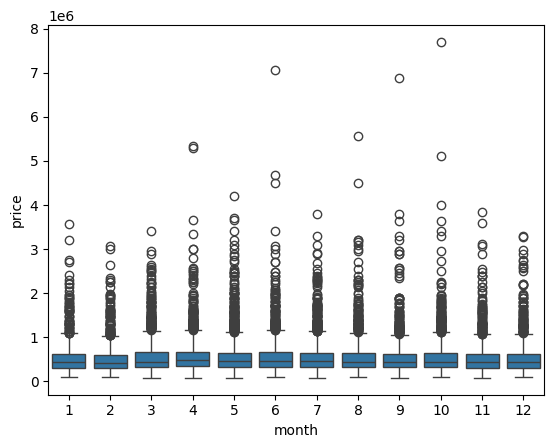

In [11]:
sns.boxplot(x = df['month'],y = df['price'])

<Axes: xlabel='month'>

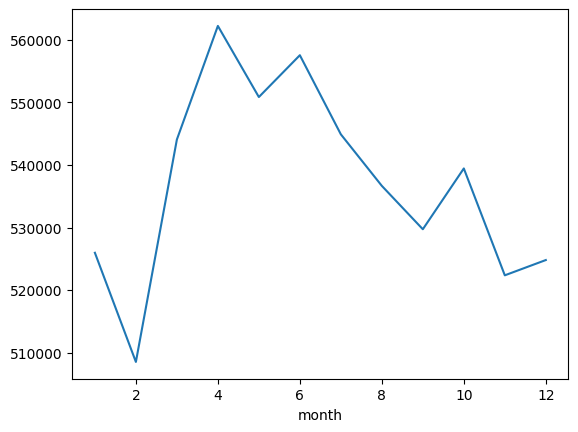

In [12]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

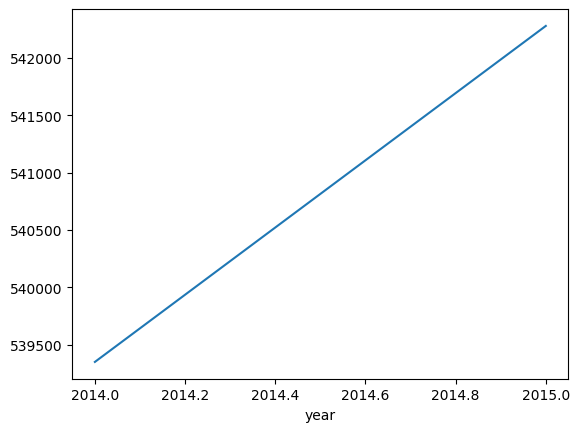

In [13]:
df.groupby('year').mean()['price'].plot()

In [12]:
df = df.drop('date',axis = 1)

In [13]:
df = df.drop('id',axis = 1)

In [16]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

C:\Users\Anil kumar\AppData\Local\Temp\ipykernel_14320\596692282.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

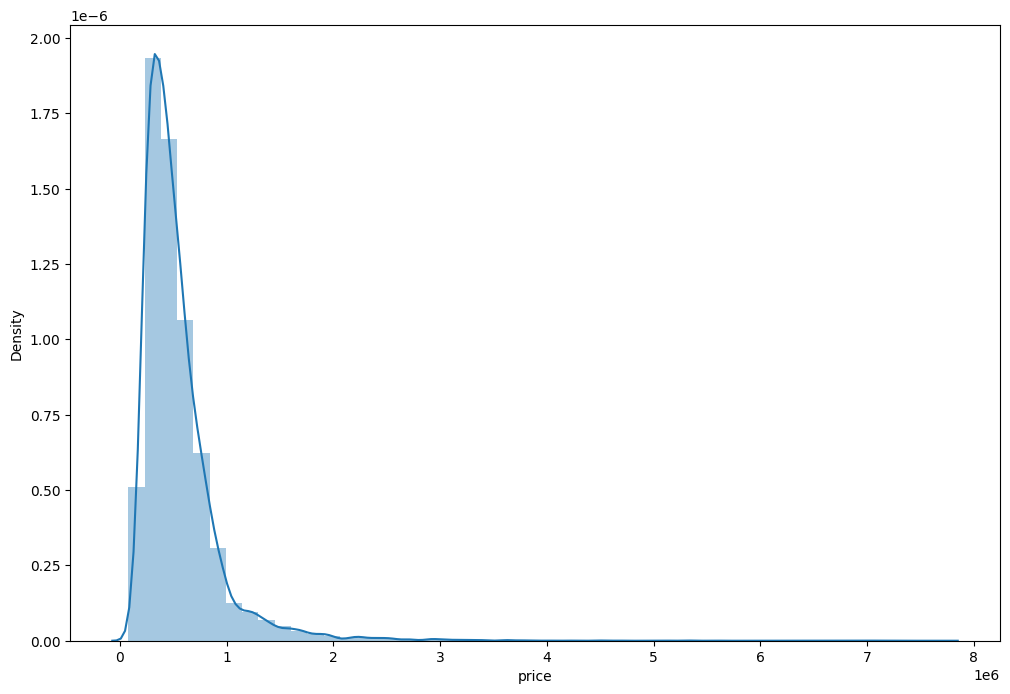

In [17]:
plt.figure(figsize = (12,8))
sns.distplot(df['price'])

<Axes: xlabel='zipcode', ylabel='count'>

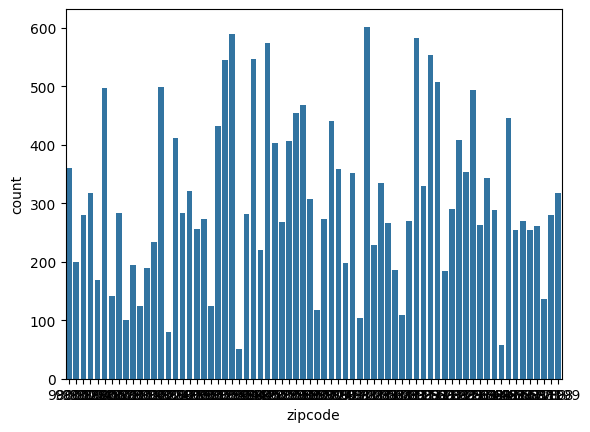

In [18]:
sns.countplot(x = df['zipcode'])

In [19]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

<Axes: xlabel='zipcode'>

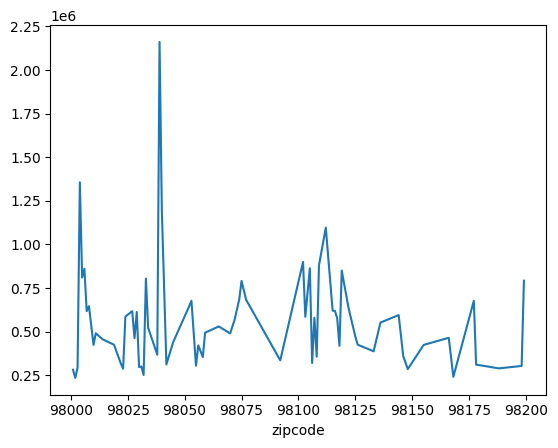

In [20]:
df.groupby('zipcode').mean()['price'].plot()

In [10]:
df = df.drop('zipcode',axis = 1)

<Axes: xlabel='price', ylabel='sqft_living'>

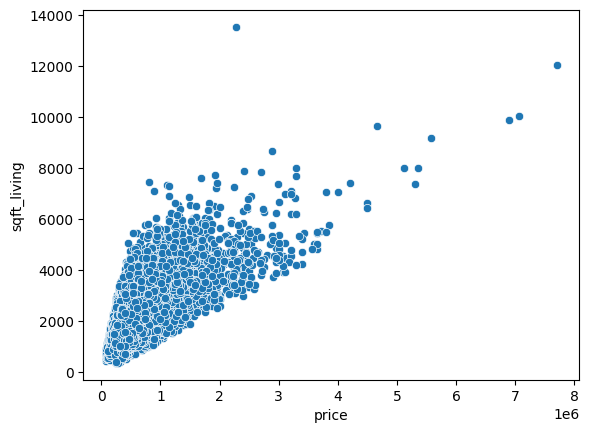

In [22]:
sns.scatterplot(x = df['price'],y = df['sqft_living'])

<Axes: xlabel='price', ylabel='sqft_lot'>

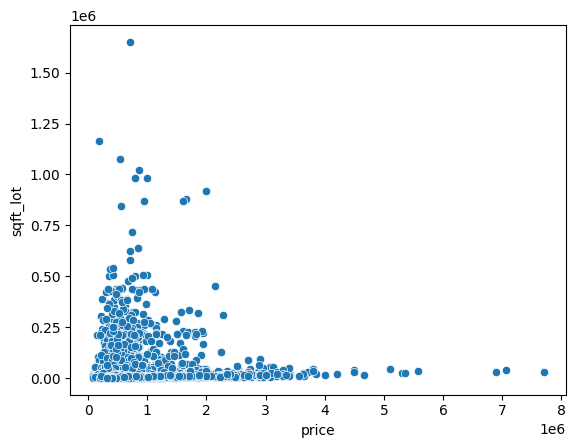

In [23]:
sns.scatterplot(x = df['price'],y = df['sqft_lot'])

<Axes: xlabel='price', ylabel='lat'>

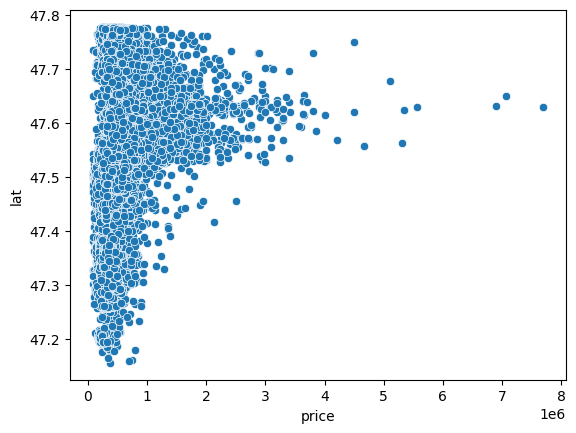

In [24]:
sns.scatterplot(x = df['price'],y = df['lat'])

<Axes: xlabel='price', ylabel='long'>

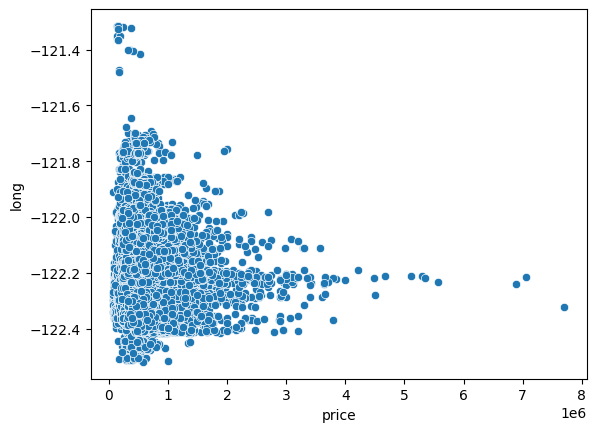

In [25]:
sns.scatterplot(x =df['price'],y = df['long'])

<Axes: xlabel='long', ylabel='lat'>

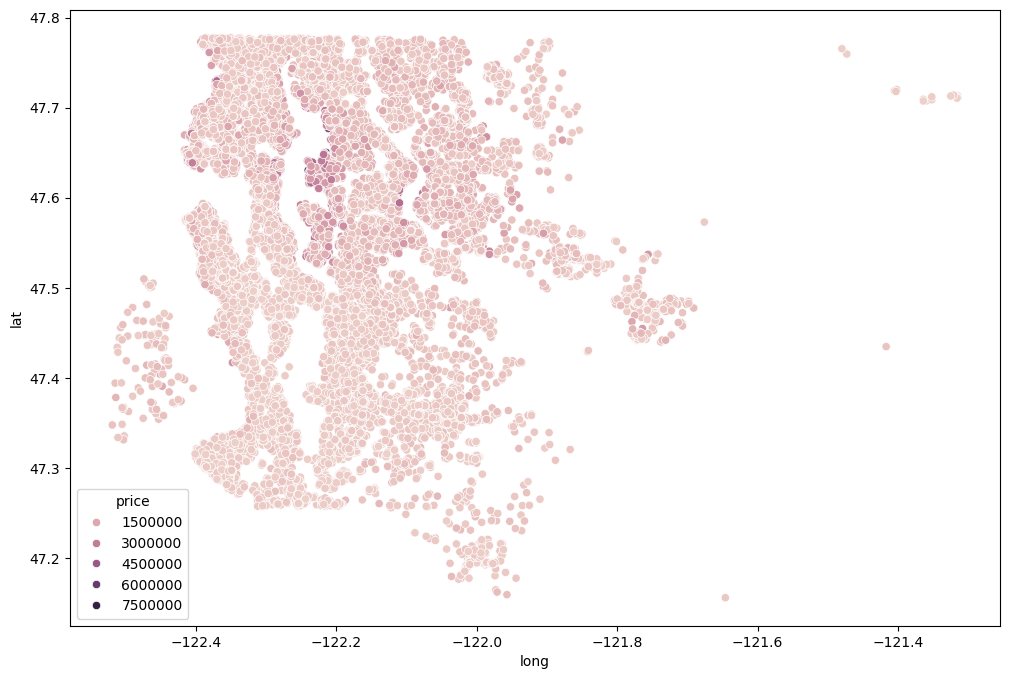

In [26]:
plt.figure(figsize = (12,8))
sns.scatterplot(x =df['long'],y = df['lat'],hue = df['price'])

<Axes: xlabel='bedrooms', ylabel='price'>

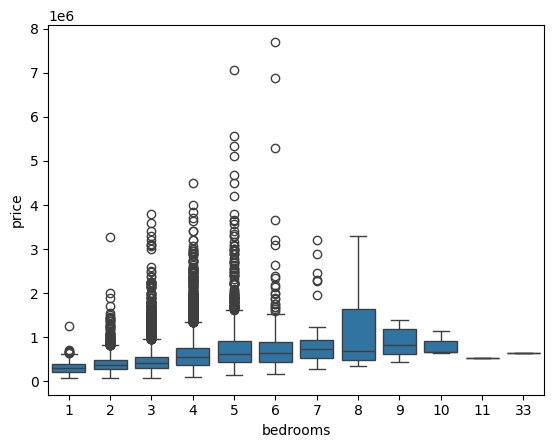

In [27]:
sns.boxplot(x = df['bedrooms'],y = df['price'])

<Axes: xlabel='price', ylabel='waterfront'>

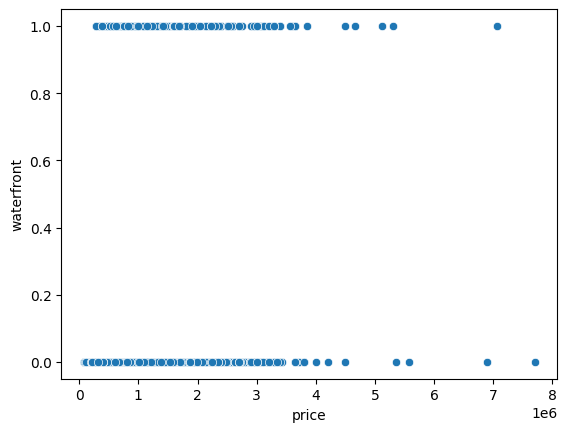

In [28]:
sns.scatterplot(x = df['price'],y = df['waterfront'])

<Axes: xlabel='price', ylabel='view'>

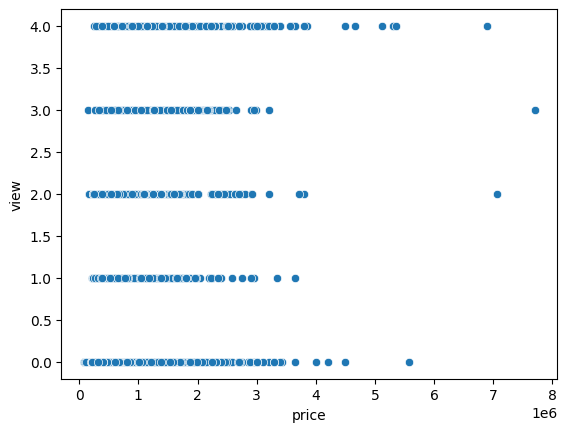

In [29]:
sns.scatterplot(x = df['price'],y = df['view'])

<Axes: xlabel='view', ylabel='waterfront'>

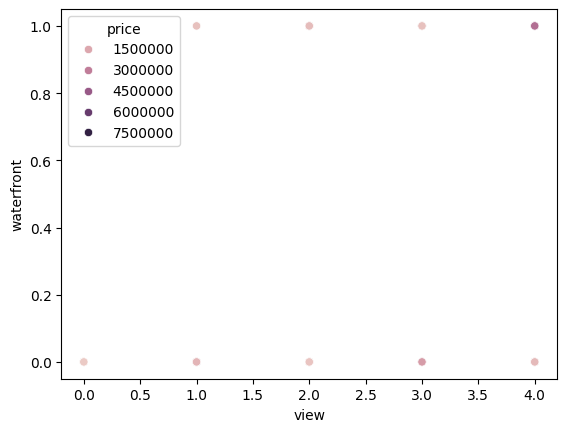

In [30]:
sns.scatterplot(x = df['view'],y = df['waterfront'],hue = df['price'])

In [31]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [32]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

<Axes: xlabel='sqft_basement'>

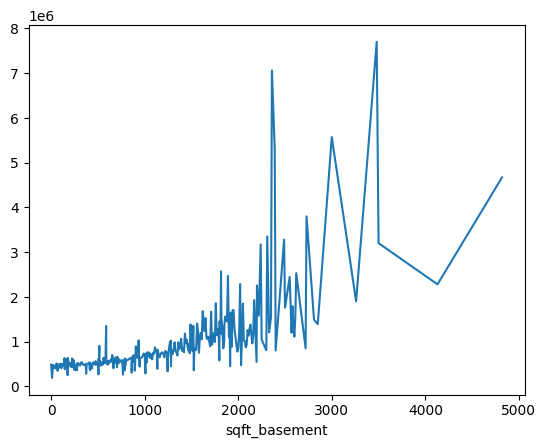

In [33]:
df.groupby('sqft_basement').mean()['price'].plot()

<Axes: xlabel='yr_renovated'>

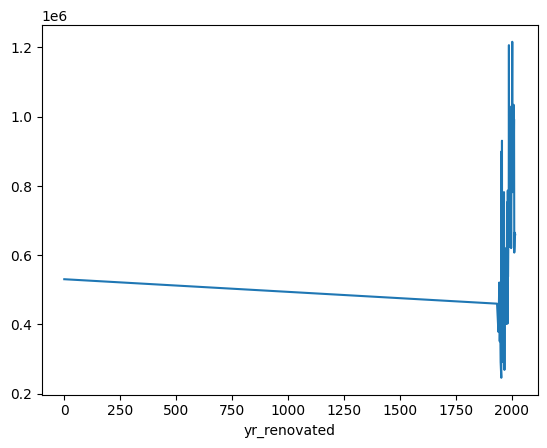

In [34]:
df.groupby('yr_renovated').mean()['price'].plot()

In [14]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          3      8        1530              0   
21593           0     0          3      8        2310              0   
21594           0     0          3      7        1020              0   
21595           0     0          3      8        1600              0   
21596           0     0          3      7        1020              0   

       yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  
0          1955             0  47.5112 -122.257           1340        5650  
1          1951          1991  47.7210 -122.319           1690        7639  
2          1933             0  47.7379 -122.233           2720        8062  
3          1965             0  47.5208 -122.393           1360        5000  
4          1987             0  47.6168 -122.045           1800        7503  
...         ...           ...      ...      ...            ...         ...  
21592      2009             0  47.6993 -122.346           1530        1509  
21593      2014             0  47.5107 -122.362           1830        7200  
21594      2009             0  47.5944 -122.299           1020        2007  
21595      2004             0  47.5345 -122.069           1410        1287  
21596      2008             0  47.5941 -122.299           1020        1357  

[21597 rows x 18 columns]

## Splitting the data

In [15]:
X = df.drop('price',axis = 1)
y = df['price']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 2)

### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train.shape

(16197, 17)

In [19]:
X_test.shape

(5400, 17)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [63]:
model = Sequential()

model.add(Dense(units = 19,activation = 'relu'))
model.add(Dense(units = 19,activation = 'relu'))
model.add(Dense(units = 19,activation = 'relu'))
model.add(Dense(units = 19,activation = 'relu'))

model.add(Dense(units = 1))

model.compile(
    optimizer = 'Adam',
    loss = 'mse'
               )

In [64]:
# TRAINING THE MODEL
model.fit(X_train,y_train.values,validation_data=(X_test,y_test.values),batch_size = 100,epochs = 100)

Epoch 1/100
162/162 [==============================] - 3s 7ms/step - loss: 422585925632.0000 - val_loss: 439147298816.0000
Epoch 2/100
162/162 [==============================] - 1s 5ms/step - loss: 416793395200.0000 - val_loss: 420063903744.0000
Epoch 3/100
162/162 [==============================] - 1s 6ms/step - loss: 353827192832.0000 - val_loss: 292891033600.0000
Epoch 4/100
162/162 [==============================] - 1s 5ms/step - loss: 180055556096.0000 - val_loss: 119294246912.0000
Epoch 5/100
162/162 [==============================] - 1s 7ms/step - loss: 93423108096.0000 - val_loss: 101752594432.0000
Epoch 6/100
162/162 [==============================] - 1s 6ms/step - loss: 88432549888.0000 - val_loss: 99323502592.0000
Epoch 7/100
162/162 [==============================] - 1s 7ms/step - loss: 86121324544.0000 - val_loss: 96817987584.0000
Epoch 8/100
162/162 [==============================] - 1s 7ms/step - loss: 83770015744.0000 - val_loss: 94300372992.0000
Epoch 9/100
162/162 [==

In [26]:
losses = pd.DataFrame(model.history.history)

<Axes: >

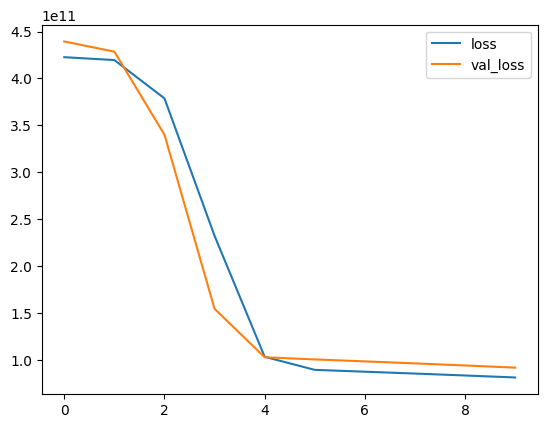

In [27]:
losses.plot()

# Evaluation on test data

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### predicting the brand new data

In [31]:
X_test

array([[0.09375   , 0.26666667, 0.11085801, ..., 0.41860465, 0.2462571 ,
        0.00623571],
       [0.0625    , 0.26666667, 0.15360668, ..., 0.26162791, 0.35105834,
        0.00562811],
       [0.09375   , 0.16666667, 0.12604404, ..., 0.35299003, 0.27551196,
        0.00856812],
       ...,
       [0.09375   , 0.36666667, 0.13211845, ..., 0.15863787, 0.23765273,
        0.00390563],
       [0.03125   , 0.06666667, 0.04328018, ..., 0.17275748, 0.18086388,
        0.01027078],
       [0.0625    , 0.3       , 0.19817768, ..., 0.26827243, 0.19291   ,
        0.01050636]])

In [32]:
y_pred = model.predict(X_test)

169/169 [==============================] - 1s 4ms/step


In [34]:
mean_absolute_error(y_test,y_pred)

109659.10479311342

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))

182242.13066339988

In [38]:
explained_variance_score(y_test,y_pred)

0.7720652834101819

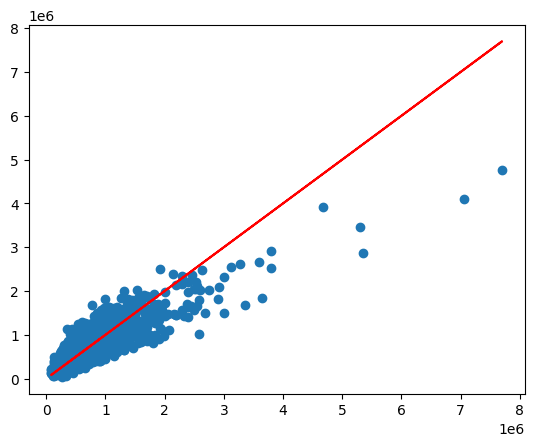

In [40]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

In [42]:
errors = y_test.values.reshape(5400, 1) - y_pred

C:\Users\Anil kumar\AppData\Local\Temp\ipykernel_13080\2392254718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

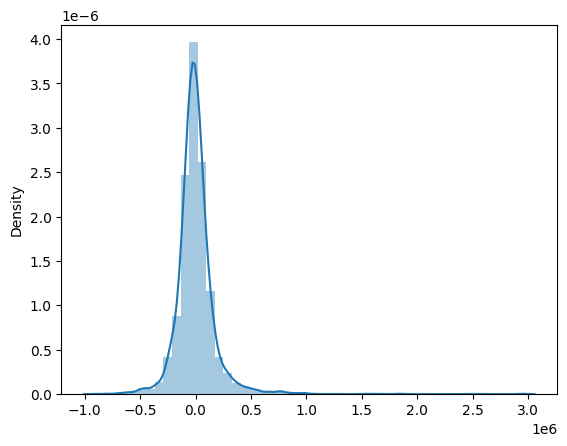

In [45]:
sns.distplot(errors)

### Predicting on brand new house

In [53]:
single_house = df.drop('price',axis=1).iloc[0]

In [54]:
single_house = scaler.transform(single_house.values.reshape(-1, 17))

C:\Users\Anil kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [56]:
single_house

array([[0.0625    , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.33333333, 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582987]])

In [59]:
model.predict(single_house)

1/1 [==============================] - 0s 296ms/step


array([[-0.00814585]], dtype=float32)